<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Data Visualization Lab***

In this assignment you will be focusing on the visualization of data. The data set will be presented to you in the form of a RDBMS. You will have to use SQL queries to extract the data.

## ***Objectives***

In this lab you will perform the following:

*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.




$ \ $

-----

## ***Demo: How to work with database***


$(1)$ Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-02-12 00:43:46--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  25.9MB/s    in 1.4s    

2023-02-12 00:43:48 (25.9 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



$ \ $

$(2)$ Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") 

$ \ $

$(3)$ Import some libraries.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

$ \ $

----

## ***Demo: How to run an sql query***

$(1)$ Print how many rows are there in the table named 'master'.


In [ ]:
#(1) we describe the query
# conn = sqlite3.connect("m4_survey_data.sqlite") 
QUERY = """SELECT COUNT(*) FROM master"""

#(2) the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,11398


$ \ $ 

$(2)$ Print all the tables names in the database "sqlite_master".


In [ ]:
#(1) print all the tables names in the database
# conn = sqlite3.connect("m4_survey_data.sqlite") 
QUERY = """ SELECT name as Table_Name
            FROM sqlite_master
            WHERE type = 'table' """


#(2) the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY, conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


$ \ $

$(3)$ In the following cell, we show how to run a group by query.


In [ ]:
QUERY = """ SELECT Age, COUNT(*) as count
            FROM master
            group by age
            order by age"""

# conn = sqlite3.connect("m4_survey_data.sqlite")            
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


$ \ $

$(3)$ In the following query, we show how to describe a table.


In [ ]:
table_name = 'master'  

QUERY = """SELECT sql
           FROM sqlite_master
           WHERE name= '{}' """.format(table_name)

df = pd.read_sql_query(QUERY, conn)

In [ ]:
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

$ \ $

-----

# ***Hands-on Lab***

$(1)$ Plot a histogram of `ConvertedComp.`


In [ ]:
QUERY = """SELECT ConvertedComp FROM master"""            
df = pd.read_sql_query(QUERY,conn)
df

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <a list of 10 Patch objects>)

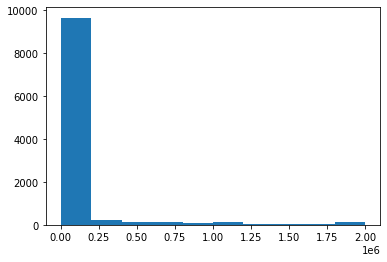

In [ ]:
plt.hist(df["ConvertedComp"])

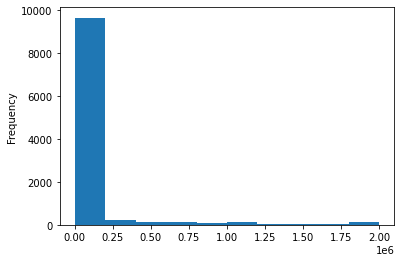

In [ ]:
df["ConvertedComp"].plot(kind='hist')

$ \ $ 

$(2)$ Plot a box plot of `Age.`


In [ ]:
QUERY = """SELECT Age FROM master"""            
df = pd.read_sql_query(QUERY,conn)
df

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0
...,...
11393,36.0
11394,25.0
11395,34.0
11396,25.0


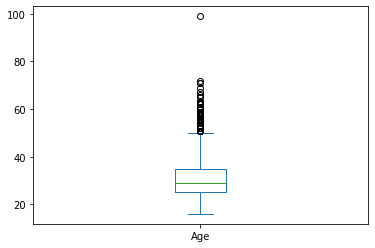

In [ ]:
df["Age"].plot(kind='box')

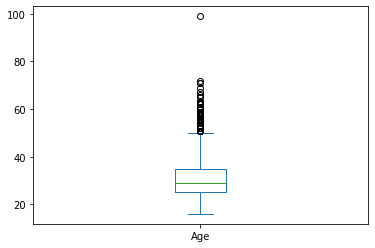

In [ ]:
df["Age"].plot.box()

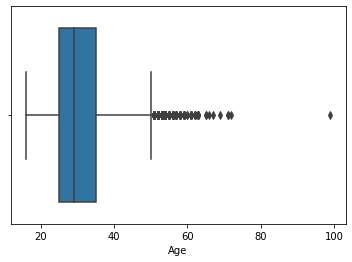

In [ ]:
sns.boxplot(x=df["Age"])

$ \ $

$(3)$ Create a scatter plot of `Age` and `WorkWeekHrs.`

In [ ]:
QUERY = """SELECT Age, WorkWeekHrs FROM master"""            
df = pd.read_sql_query(QUERY,conn)
df 

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0
...,...,...
11393,36.0,40.0
11394,25.0,40.0
11395,34.0,40.0
11396,25.0,42.5


In [ ]:
df.corr()

,Age,WorkWeekHrs
Age,1.000000,0.036517
WorkWeekHrs,0.036517,1.000000


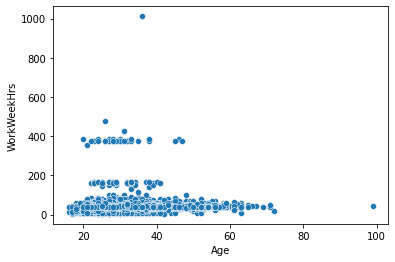

In [ ]:
sns.scatterplot(data=df, x="Age", y="WorkWeekHrs")

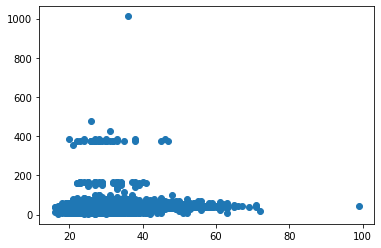

In [ ]:
plt.scatter(df["Age"], df["WorkWeekHrs"])

$ \ $ 

$(4)$ Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [ ]:
QUERY = """SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"""            
df = pd.read_sql_query(QUERY,conn)
df

,WorkWeekHrs,CodeRevHrs,Age
0,80.0,NaN,22.0
1,32.0,12.0,23.0
2,40.0,5.0,28.0
3,40.0,NaN,26.0
4,45.0,5.0,29.0
...,...,...,...
11393,40.0,NaN,36.0
11394,40.0,5.0,25.0
11395,40.0,5.0,34.0
11396,42.5,2.0,25.0


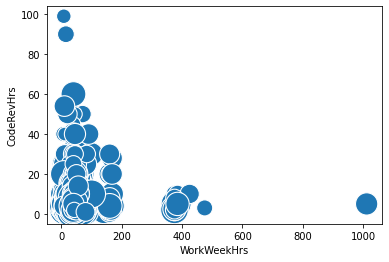

In [ ]:
sns.scatterplot(data=df, x="WorkWeekHrs", y="CodeRevHrs", size="Age", legend=False, sizes=(20, 2000))

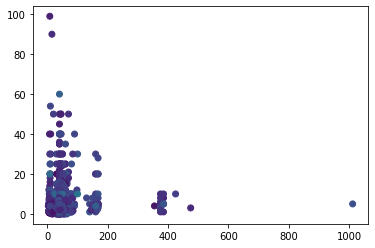

In [ ]:
plt.scatter(df["WorkWeekHrs"], df["CodeRevHrs"], c= df["Age"], alpha=1)

$ \ $ 

$(5-a)$  Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [ ]:
QUERY = """SELECT Respondent,	DatabaseDesireNextYear
           FROM DatabaseDesireNextYear"""  

df = pd.read_sql_query(QUERY,conn).groupby("DatabaseDesireNextYear").count()
df = df.sort_values('Respondent', ascending=False)
df = df.reset_index()[0:5]
df

,DatabaseDesireNextYear,Respondent
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


$ \ $ 

$(5-b)$  In the list of most popular languages respondents wish to learn next year, what is the rank of Python?

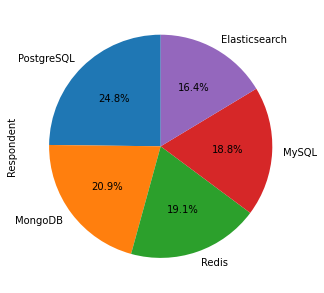

In [ ]:
# autopct create %, start angle represent starting point
df["Respondent"].plot(kind='pie',
                      figsize = (5, 6),
                      autopct = '%1.1f%%', # add in percentages
                      startangle = 90,     # start angle 90° (Africa)                     
                      labels = df["DatabaseDesireNextYear"], 
                      )

$ \ $

$(6)$ In the list of most popular languages respondents wish to learn next year, what is the rank of Python?

In [ ]:
QUERY = """SELECT *
           FROM LanguageDesireNextYear"""  

df = pd.read_sql_query(QUERY, conn).groupby("LanguageDesireNextYear").count()
df = df.sort_values('Respondent', ascending=False)
df = df.reset_index()
df[:5]

,LanguageDesireNextYear,Respondent
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


$ \ $

$(7)$ How many respondents indicated that they currently work with 'SQL'? 

In [ ]:
QUERY = """SELECT *
           FROM LanguageWorkedWith"""  

df = pd.read_sql_query(QUERY, conn).groupby("LanguageWorkedWith").count()
df = df.sort_values('Respondent', ascending=False)
df = df.reset_index()
df[:5]

,LanguageWorkedWith,Respondent
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


$ \ $

$(8)$ How many respondents indicated that they work on 'MySQL' only? 

In [ ]:
QUERY = """SELECT *
           FROM DatabaseWorkedWith"""  

df = pd.read_sql_query(QUERY, conn)


def ext_dict(x):
  m = df.shape[0]
  lista_indices = []
  for i in range(0,m):
    if df.loc[i,"Respondent"] == x:
      lista_indices.append(i)
  lista = []
  for x in lista_indices:
    lista.append(df.loc[x,"DatabaseWorkedWith"])
  return len(lista)

data = list(set(df[df["DatabaseWorkedWith"]=="MySQL"]["Respondent"].to_dict().values()))


In [ ]:
numero = 0
for x in data:
  if ext_dict(x)==1:
    numero += 1
numero

474

$ \ $ 

$(9)$ Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [ ]:
QUERY = """SELECT WorkWeekHrs, CodeRevHrs, Age
           FROM master
           WHERE Age between 30 and 35"""  

df = pd.read_sql_query(QUERY,conn)
df = df.groupby("Age").median()
df

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


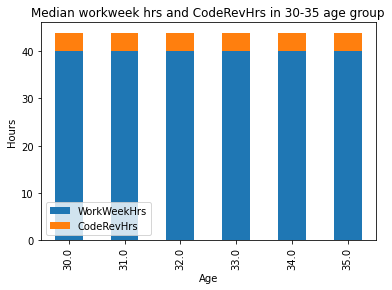

In [ ]:
df.plot(kind='bar', stacked=True)
plt.title('Median workweek hrs and CodeRevHrs in 30-35 age group')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

$ \ $

$(10)$ Majority of the survey responders are:

In [ ]:
QUERY = """SELECT *
           FROM DevType"""  

df = pd.read_sql_query(QUERY,conn).groupby("DevType").count().sort_values(by='Respondent', ascending=False).reset_index()
df

,DevType,Respondent
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


$ \ $ 

$(11)$ Plot the median `ConvertedComp` for all ages from 45 to 60.


In [ ]:
QUERY = """SELECT ConvertedComp, Age
           FROM master
           WHERE Age between 45 and 60"""  

df = pd.read_sql_query(QUERY,conn)
df = df.groupby("Age").median()
df

,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0
50.0,95000.0
51.0,100000.0
52.0,105500.0
53.0,100463.0


$ \ $ 

$(12)$ Create a horizontal bar chart using column `MainBranch.`


In [ ]:
QUERY = """SELECT MainBranch, count(*) as number
           FROM master"""  

df = pd.read_sql_query(QUERY,conn)
df

,MainBranch,number
0,I am a developer by profession,11398


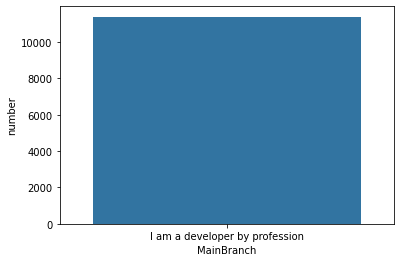

In [ ]:
sns.barplot(x=df["MainBranch"], y=df["number"])

<BarContainer object of 1 artists>

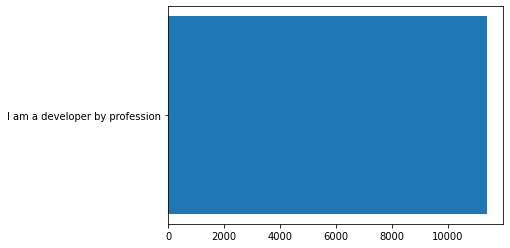

In [ ]:
plt.barh(df["MainBranch"], df["number"])

$ \ $ 

$(13)$ Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp? 

In [ ]:
QUERY = """SELECT ConvertedComp, Age
           FROM master
           WHERE Age between 25 and 30"""  

df = pd.read_sql_query(QUERY,conn).groupby("Age").median().reset_index()
df.corr()

,Age,ConvertedComp
Age,1.00000,0.97939
ConvertedComp,0.97939,1.00000


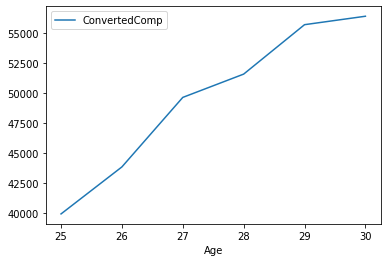

In [ ]:
df.plot(x="Age", y="ConvertedComp")

$ \ $ 

$(14)$ Close the database connection.


In [ ]:
#conn.close()